<a href="https://colab.research.google.com/github/donna6355/study_python/blob/master/mini_project_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# 코랩 konlpy 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

# Mecab 설치 후 Google Drive에 복사
!cp -r /usr/local/lib/mecab /content/drive/MyDrive/mecab
!cp -r /usr/local/etc/mecabrc /content/drive/MyDrive/mecab

!pip install kiwipiepy
import pandas as pd
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from konlpy.tag import Okt
from tqdm import tqdm

Mounted at /content/drive
--2026-02-25 03:48:22--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2026-02-25 03:48:22--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3978ec1d8f145334ffc88f8628.dl.dropboxusercontent.com/cd/0/inline/C7iEh6eeJOOqIUTiuCS21oaibgoQw1PNbWQ6e-I1y7q5cTl8EOcAn6VCGhXE2BL-2R901vy2g5io2c8xSW_G4Exi69l0uF2m0y-eihtISvGYCDmXIlLb01LmM9VUOuANWbTA_I5lKHpCA4llZM_mP1mq/file?dl=1# [following]
--2026-02-

In [2]:
df = pd.read_excel('실습데이터_머니케어.xlsx')
df

,time,review
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...
...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...


In [10]:
# 4. tokenizing
tqdm.pandas() # progress_apply와 사용 가능!
okt = Okt()


def extract_pos(text, pos):
  left = []
  for t,c in okt.pos(text, stem = True, norm = True):
    if c in pos:
      left.append(t)
  return left

df["token"] = df["review"].progress_apply(lambda x : extract_pos(x, ['Noun', 'Verb','Adjective']))
df

100%|██████████| 1019/1019 [03:47<00:00,  4.48it/s]


,time,review,token
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[나, 가계부, 지출, 년, 월, 생활비, 정산, 만, 원, 가계부, 인, 가구, ..."
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ..."
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 하다, 경제, 흐름, 알다, 왜, 예금, 하다, 단지..."
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 년, 금리, 변동, 카카오, ..."
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,..."
...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 셋, 보다, 월, 주, 밸런스, 프렌즈, 토글, 리더, 스, 나, 많다, ..."
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 바쁘다, 탤, 공주, 넘다,..."
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ..."
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 이번, 글, 사진, 레전드, 많다, 최대, 장수, 나, 생..."


In [8]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.8 MB/s eta 0:00:00


In [11]:

import gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

#embedding Doc2Vec

tagged_corpus_list = []
for index, row in df.iterrows():
  text = row['token']
  tag = f'document {index}'
  tagged_corpus_list.append(TaggedDocument(tags = [tag], words = text))
# len(tagged_corpus_list)

d2v_model = Doc2Vec(vector_size=300, window = 5, dm=1)
d2v_model.build_vocab(tagged_corpus_list)
d2v_model.train(tagged_corpus_list, total_examples=d2v_model.corpus_count, epochs = 30)

In [12]:
df['vector'] = [d2v_model.dv.get_vector(f'document {i}') for i in df.index]
df

,time,review,token,vector
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[나, 가계부, 지출, 년, 월, 생활비, 정산, 만, 원, 가계부, 인, 가구, ...","[0.30756757, 0.5918555, 0.461231, 0.046143718,..."
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[0.27674928, 0.15712692, 0.13509633, 0.1298834..."
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 하다, 경제, 흐름, 알다, 왜, 예금, 하다, 단지...","[0.13865133, 0.23854105, -0.1422634, -0.244948..."
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 년, 금리, 변동, 카카오, ...","[0.2509269, 0.23787966, 0.4049208, -0.05299510..."
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,...","[0.258239, 0.17201473, 0.14492722, -0.18530975..."
...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 셋, 보다, 월, 주, 밸런스, 프렌즈, 토글, 리더, 스, 나, 많다, ...","[0.63227224, 0.9904623, -0.20603919, 0.2416802..."
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 바쁘다, 탤, 공주, 넘다,...","[0.27612135, 0.4148776, 0.9310572, -0.10018817..."
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[0.29272598, -0.0033324107, -0.10790638, 0.482..."
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 이번, 글, 사진, 레전드, 많다, 최대, 장수, 나, 생...","[0.45119035, 0.5115195, 0.41722584, -0.2367723..."


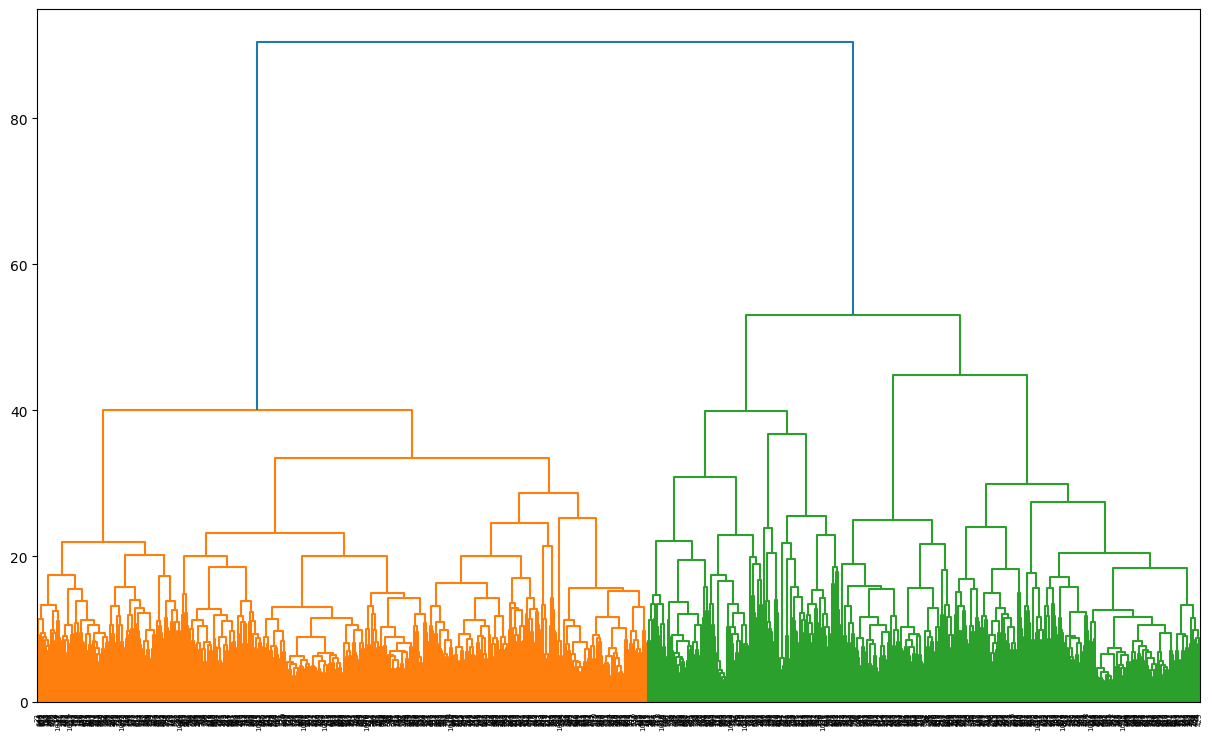

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#dendrogram 시각화로 적절한 클러스터 사이즈를 예측해본다
#method="ward" -> 거리가 아닌 밀도기반
linked = linkage(list(df['vector']), method="ward")
plt.figure(figsize=(15,9))
dendrogram(linked)
plt.show()

100%|██████████| 9/9 [00:03<00:00,  2.67it/s]


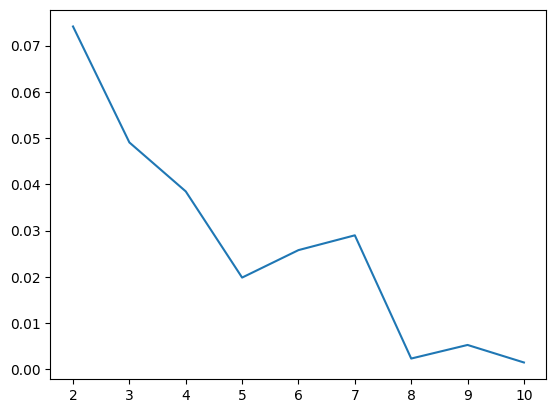

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

scores = []
for i in tqdm(range(2,11)):
  agg = AgglomerativeClustering(n_clusters = i, linkage = 'ward')
  prediction = agg.fit_predict(list(df['vector']))
  score = silhouette_score(list(df['vector']),prediction)
  scores.append(score)

plt.plot(range(2,11),scores)

In [31]:
#clustering
agg = AgglomerativeClustering(n_clusters = 7, linkage = 'ward')
df['cluster'] = agg.fit_predict(list(df['vector']))
df

,time,review,token,vector,cluster
0,2023. 5. 30. 17:09,나의 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 ...,"[나, 가계부, 지출, 년, 월, 생활비, 정산, 만, 원, 가계부, 인, 가구, ...","[0.30756757, 0.5918555, 0.461231, 0.046143718,...",0
1,2022. 10. 9. 22:41,신혼부부가계부 신혼부부 가계부화목 화목 신혼부부 가계부입당 화연휴 끝나고 오랜만에 ...,"[신혼부부, 가계부, 신혼부부, 가계부, 화목, 화목, 신혼부부, 가계부, 입당, ...","[0.27674928, 0.15712692, 0.13509633, 0.1298834...",0
2,2022. 7. 2. 4:34,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,"[예금, 진실, 문득, 투자, 하다, 경제, 흐름, 알다, 왜, 예금, 하다, 단지...","[0.13865133, 0.23854105, -0.1422634, -0.244948...",1
3,2022. 7. 6. 5:19,카카오뱅크 청년전세자금대출 연장 년 금리변동 카카오뱅크 청년전세자금대출 서류금리...,"[카카오, 뱅크, 청년, 전세, 자금, 대출, 연장, 년, 금리, 변동, 카카오, ...","[0.2509269, 0.23787966, 0.4049208, -0.05299510...",2
4,2022. 8. 15. 18:08,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,"[탕, 다시다, 가다, 삼성, 병원, 가지, 베이컨, 그라탕, 해, 먹기, 미치다,...","[0.258239, 0.17201473, 0.14492722, -0.18530975...",0
...,...,...,...,...,...
1014,2022. 10. 11. 11:05,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,"[스물, 셋, 보다, 월, 주, 밸런스, 프렌즈, 토글, 리더, 스, 나, 많다, ...","[0.63227224, 0.9904623, -0.20603919, 0.2416802...",1
1015,2023. 2. 5. 22:20,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,"[직장인, 생, 탤이, 생, 겨울방학, 끝, 동분서주, 바쁘다, 탤, 공주, 넘다,...","[0.27612135, 0.4148776, 0.9310572, -0.10018817...",1
1016,2023. 4. 3. 14:11,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...","[0.29272598, -0.0033324107, -0.10790638, 0.482...",2
1017,2022. 9. 23. 1:20,외쳐 갓생 하이루이번 글 사진 레전드 많음 최대 장수 나의 갓생 시작 먹던 햄...,"[외치다, 생, 하이루, 이번, 글, 사진, 레전드, 많다, 최대, 장수, 나, 생...","[0.45119035, 0.5115195, 0.41722584, -0.2367723...",4


In [32]:
df['cluster'].value_counts()

,count
cluster,
0,409
1,215
4,126
2,101
3,100
5,54
6,14


In [100]:
#중간 저장
import pickle
with open('money.pkl','wb') as file:
    pickle.dump(df,file)

In [33]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

all_document = []
for i in df['cluster'].unique():
  temp = df.loc[df['cluster'] == i]['token']
  cluster_document = ''
  for w in temp:
    doc = " ".join(w)+' '
    cluster_document+=doc
  all_document.append(cluster_document)
all_document[0]

'나 가계부 지출 년 월 생활비 정산 만 원 가계부 인 가구 자취 생활비 식비 아끼다 고정 지출 생활비 아끼다 무 지출 직장인 짜다 테크 벌써 가계부 작성 한지 개월 되어다 월 생활비 원 월 생활비 원 월 생활비 지난달 대비 원 바 가계부 쓰다 있다 게 의미 없다 정도 로비 슷 비슷하다 개월 사실 이번 달 초 저녁 약속 시험 원서 접수 비 고양이 용품 등 화끈하다 돈 써다 버리다 때문 남다 하다 달 쪼들리다 사람 이츠미 이번 달 당근 거래 무려 원 벌다 당근 거래 처음 해보다 떨리다 하다 애송이 중고 거래 만렙 되어다 이번 달 갑작스럽다 생기다 약속 있다 서예 비용 벗어나다 힐링 하다 수 있다 좋다 지출 이다 보다 고양이 모래 하다 달 만 원 들다 줄 모르다 고양이 간식 밥 장난감 아니다 모래 제일 비싸다 이번 달 타투 안 하다 전월 덜 써다 거 이다 말 하하 후회 전혀 없다 이제 가계부 작성 하다 것 아니다 분석 하다 외식 식비 공부 고양이 약 기타 약속 줄이다 것 답 없다 물가 후 덜덜 하다 월 여름 휴가 제외 공부 열중 하다 터 생활비 만 원 목표 하다 보다 파이팅 신혼부부 가계부 신혼부부 가계부 화목 화목 신혼부부 가계부 입당 화 연휴 끝나다 만 출근 하다 힘들다 힘드다 몸 이끌다 끌리다 필라테스 다녀오다 하다 싶다 식빵 들다 집 저녁 김치찌개 손목 아프다 발목 점점 아프다 출근길 포인트 발목 보호대 구매 출근 못 하다 같다 하다 퇴근 후 오후 병원 가다 하다 퇴근 하다 좀 낫다 같다 그냥 집 서다 쉬다 저녁 먹다 야식 시장 곱창 목또 아침 일어나다 발목 아프다 출근 못 하나 하다 하다 출근 전 병원 가다 처방 받다 일 여기저기 아프다 곳 없다 퇴근 하다 만 샐러드 토 포샵 겅 부다 음주 포토샵 일러스트 학원 다니다 틈틈하다 유튭 보고 공부 이다 경제적자유 앞당기다 탕 다시다 가다 삼성 병원 가지 베이컨 그라탕 해 먹기 미치다 폭우 전쟁 하다 급 양양 떠나다 아버지 진료 때문 병원 들리다 시반 도착 하다 진료 보고 기다리다 처치 받다 벌써 점심시간 근처

In [108]:
#현재 클러스터 출현 빈도 / 전체 문서 빈도
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

all_document = []
for i in df['cluster'].unique():
  temp = df.loc[df['cluster'] == i]['token']
  cluster_document = ''
  for w in temp:
    doc = " ".join(w)+' '
    cluster_document+=doc
  all_document.append(cluster_document)

cnt = []
total = ''
for i in all_document:
  cnt.append(dict(Counter(i.split())))
  total += i
total = dict(Counter(total.split()))


ratio = []
for i in cnt:
  dic = {}
  for w in i:
    dic[w] = i[w]/total[w]
  ratio.append(dic)

result = pd.DataFrame()
num = 0
for a, i in zip(cnt, ratio):
  temp = pd.DataFrame({'token':list(a.keys()),'count':list(a.values()),'ratio':list(i.values())})
  temp = temp.sort_values(by="count", ascending=False).iloc[:100].sort_values(by="ratio", ascending=False).reset_index(drop = True)
  temp.columns = [f'token {num}',f'count {num}',f'ratio {num}']
  result = pd.concat([result,temp], axis = 1)
  num +=1

result

,token 0,count 0,ratio 0,token 1,count 1,ratio 1,token 2,count 2,ratio 2,token 3,...,ratio 3,token 4,count 4,ratio 4,token 5,count 5,ratio 5,token 6,count 6,ratio 6
0,퇴근,214,0.633136,독서,96,0.727273,알뜰,52,0.753623,시험,...,0.423529,변동,56,0.746667,자산,250,0.778816,대리권,19,1.000000
1,맛,205,0.569444,읽다,226,0.475789,적립,59,0.728395,재밌다,...,0.397380,예산,102,0.723404,억,61,0.484127,청북,17,1.000000
2,출근,239,0.561033,책,228,0.461538,교통카드,50,0.675676,예쁘다,...,0.389831,외식,57,0.633333,관리,189,0.431507,증여세,22,1.000000
3,먹다,1465,0.556400,매일,136,0.448845,뱅크,142,0.563492,카페,...,0.384416,수입,97,0.587879,퇴사,47,0.391667,권한,15,0.937500
4,맛있다,370,0.553892,계획,109,0.432540,금융,52,0.553191,길,...,0.383673,생활비,114,0.581633,현금,44,0.376068,임대료,20,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,있다,1366,0.267738,달,100,0.144092,쓰다,66,0.059140,일,...,0.102219,좋다,103,0.060947,지출,39,0.045244,때,18,0.012694
96,생각,428,0.245695,또,97,0.134910,시간,72,0.059065,것,...,0.100394,집,64,0.060264,쓰다,50,0.044803,좋다,19,0.011243
97,해보다,179,0.245542,날,141,0.129715,거,62,0.053265,되다,...,0.097661,먹다,137,0.052032,집,44,0.041431,같다,19,0.010160
98,수,375,0.219427,진짜,109,0.102733,가다,84,0.042857,않다,...,0.089720,시간,55,0.045119,가다,69,0.035204,생각,17,0.009759


In [103]:
c = 5 * 3
result.iloc[:,c:c+3].head(50)

,token 5,count 5,ratio 5
0,자산,250,0.778816
1,억,61,0.484127
2,관리,189,0.431507
3,퇴사,47,0.391667
4,현금,44,0.376068
5,투자,134,0.365123
6,및,57,0.327586
7,보험,40,0.322581
8,재테크,63,0.315000
9,주식,60,0.301508


In [106]:
df.loc[df['cluster'] == 5]


,time,review,token,vector,cluster
16,2023. 5. 22. 23:58,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,"[면접, 보다, 지치다, 은, 시, 오라, 하다, 오전, 외출, 시간, 쓰다, 면접...","[-0.24352694, 0.43955573, -0.37141, -0.3428324...",5
18,2022. 6. 14. 23:29,사회초년생 시드머니 만들기 나는 매달매년 얼마를 모아야할까 투자를 하기 위해서...,"[사회, 초년, 생, 시드머니, 만들기, 나, 매달, 매년, 얼마, 모으다, 야하다...","[-0.46348634, 1.318787, -0.39131448, -0.064321...",5
37,2023. 5. 28. 11:28,프로강사 권팀장 순천시 청년센터 금융강의 금융계의 화석 금융계의 화석 권팀장권미랑...,"[프로, 강사, 권팀, 순천시, 청년, 센터, 금융, 강의, 금융, 화석, 금융, ...","[0.16991332, 0.25696918, 0.2893579, -0.4150004...",5
77,2023. 4. 9. 11:42,자산관리 잔머리 굴러가는 자산관리 박님 현재 명의 분들에게 믿을 수 있는자산관...,"[자산, 관리, 잔, 머리, 굴러가다, 자산, 관리, 박, 현재, 명의, 분, 믿다...","[-0.27518436, 1.4590006, 0.005036352, 0.258682...",5
121,2023. 2. 13. 11:47,오독인의 독서 인사이트 지금 적금이 중요한 것이 아닙니다 의 독서 인사이트읽은 책 ...,"[인의, 독서, 인사이트, 지금, 적금, 중요하다, 것, 아니다, 의, 독서, 인사...","[0.329184, 0.8540721, -0.116098575, 0.03421955...",5
138,2023. 2. 6. 12:59,정보 렌즈삽입술 년 후 상태는 수술 당일 회복 이보 쩡우입니다렌즈삽입술을 한 지 ...,"[정보, 렌즈삽입술, 년, 후, 상태, 수술, 당일, 회복, 이보, 쩡우, 이다, ...","[-0.31689778, 1.4210684, -0.16343918, 0.421277...",5
196,2023. 5. 19. 13:40,퇴사 퇴사 주절주절 금요일 올해 월 대학 졸업 후 들어간 첫 직장에서 년간 일을...,"[퇴사, 퇴사, 금요일, 올해, 월, 대학, 졸업, 후, 들어가다, 첫, 직장, 년...","[0.20721598, 0.72217363, 0.14700581, 0.1302816...",5
197,2022. 7. 18. 5:54,투자 저축 마인드 삶을 하며 성장하자입니다은 제가 지금까지 살아오면서 가...,"[투자, 저축, 마인드, 삶, 하다, 성장하다, 이다, 제, 지금, 살아오다, 가지...","[0.8479487, 0.9129265, -0.10204829, -0.3249964...",5
207,2023. 5. 4. 23:51,수 수은 오후 시 분에선릉역 근처 선릉과 정릉에서님 님 님을 만났다대출을 어떻게 ...,"[수, 수은, 오후, 시, 분, 선릉역, 근처, 선릉, 정릉, 님, 님, 만나다, ...","[0.92130566, 0.95066607, 0.6387085, -0.3195008...",5
219,2023. 4. 12. 10:53,갓줌마의 갓생살기연재 인스타툰 추천 갓줌마의 갓생살기 화 이런 회사 제발 도망쳐요 ...,"[줌마, 생살, 연재, 인스타, 툰, 추천, 줌마, 생, 살기, 화, 이렇다, 회사...","[-0.5912148, 0.82924616, -0.3789318, 0.3055806...",5
